<a href="https://colab.research.google.com/github/sonjoy1s/kaggle_project/blob/main/Water_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier


In [193]:
df = pd.read_csv("/content/water_potability.csv")

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [195]:
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [196]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [197]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [198]:
X = df.drop('Potability',axis=1)
y = df['Potability']

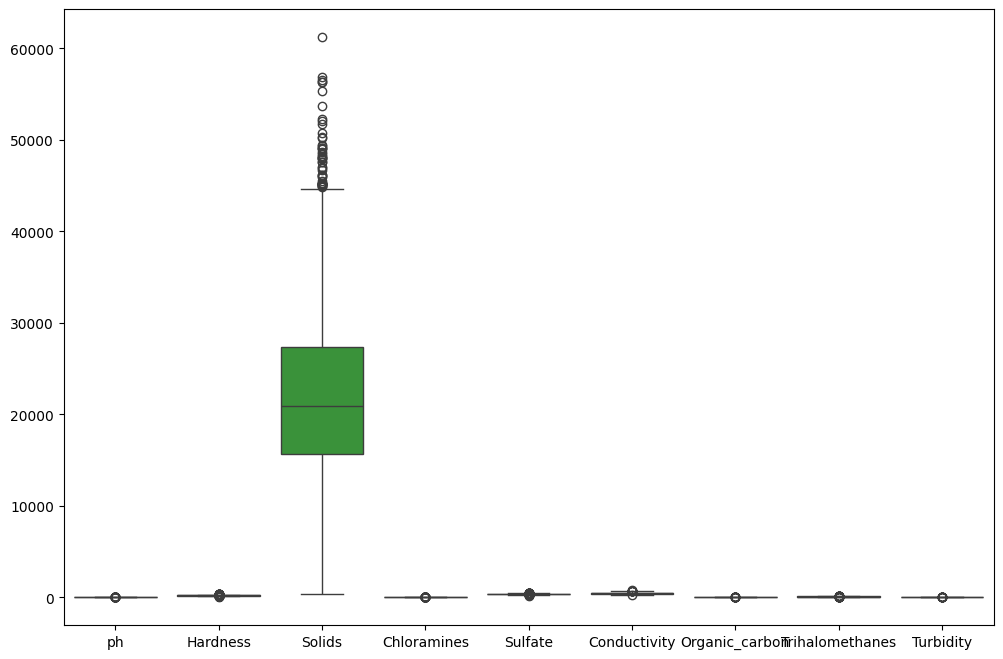

In [199]:
plt.figure(figsize=(12,8))
sns.boxplot(data=X)
plt.show()

In [200]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [201]:
numeric_features = X.select_dtypes(include = ['int64','float64']).columns
categorical_features = X.select_dtypes(include = ['object']).columns

In [202]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(np.log1p, validate=False)),
    ('scaler', RobustScaler())
])

In [203]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [204]:
# base learner
lgr = LogisticRegression(class_weight='balanced', max_iter=1000)
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf_clf = RandomForestClassifier(class_weight='balanced',random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42)
svc_cls = SVC(random_state=42)



In [205]:
#voting regressor

voting_cls = VotingClassifier(
    estimators=[
        ('rf', rf_clf),#randomforest
        ('gb', gb_clf), # Gradientboosting
        ('xgb', xgb_clf), # Xgbclassifier

    ]
)

In [206]:
#stacking
stacking_cls = StackingClassifier(
    estimators=[
     ('lgr', lgr),
    ('rf', rf_clf),
    ('gb', gb_clf),
    ('xgb', xgb_clf)
])

In [207]:
model_train = {
    'Logistic Regression': lgr,
    'Decision Tree': dtc,
    'KNN': knn,
    'Random Forest': rf_clf,
    'Gradient Boosting': gb_clf,
    'XGBoost': xgb_clf,
    'SVC': svc_cls,
    'Voting Classifier': voting_cls,
    'Stacking Classifier': stacking_cls

}

In [208]:
results = []
for name, model in model_train.items():
  pipe = Pipeline(
      [
          ('numercal_pipe',num_pipeline),
          ('model',model)
      ]
  )

  pipe.fit(X_train,y_train)

  y_pred = pipe.predict(X_test)

  accuracy = accuracy_score(y_test,y_pred)
  cls_rep = classification_report(y_test,y_pred)
  cnf_mat = confusion_matrix(y_test,y_pred)
  results.append(
      {
          'Model Name': name,
          'Accuracy': accuracy,
          'Classification Report': cls_rep,
          'Confusion Matrix': cnf_mat
      }
  )

  result_df = pd.DataFrame(results).sort_values("Accuracy", ascending=False)
print(result_df)

            Model Name  Accuracy  \
7    Voting Classifier  0.670732   
6                  SVC  0.670732   
3        Random Forest  0.664634   
8  Stacking Classifier  0.663110   
4    Gradient Boosting  0.652439   
5              XGBoost  0.646341   
2                  KNN  0.605183   
1        Decision Tree  0.583841   
0  Logistic Regression  0.524390   

                               Classification Report          Confusion Matrix  
7                precision    recall  f1-score   ...    [[363, 37], [179, 77]]  
6                precision    recall  f1-score   ...    [[368, 32], [184, 72]]  
3                precision    recall  f1-score   ...    [[361, 39], [181, 75]]  
8                precision    recall  f1-score   ...    [[356, 44], [177, 79]]  
4                precision    recall  f1-score   ...    [[365, 35], [193, 63]]  
5                precision    recall  f1-score   ...   [[322, 78], [154, 102]]  
2                precision    recall  f1-score   ...    [[310, 90], [169

Final Accuracy: 0.6707317073170732


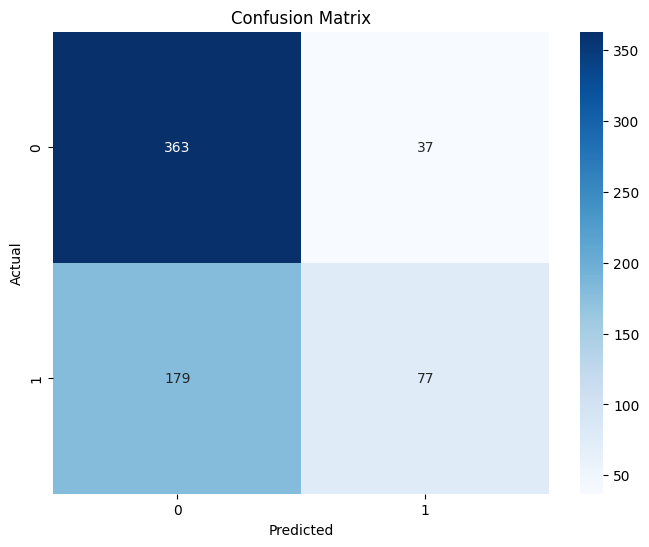

In [209]:
best_model = result_df.iloc[0]['Model Name']
best_model_obj = model_train[best_model]

final_pipe = Pipeline(
    [
        ('preprocessor',num_pipeline),
        ('model',best_model_obj)
    ]
)

final_pipe.fit(X_train,y_train)
y_final_pred = final_pipe.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_final_pred))

cm = confusion_matrix(y_test, y_final_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [210]:
# cross validation
from sklearn.model_selection import cross_val_score
svc_pipe = Pipeline(
    [
        ('numercal_pipe',num_pipeline),
        ('model',SVC(class_weight='balanced',probability=True))
    ]
)

In [211]:
svc_pipe.fit(X_train,y_train)

Pipeline(steps=[('numercal_pipe',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('log',
                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                 ('scaler', RobustScaler())])),
                ('model', SVC(class_weight='balanced', probability=True))])

In [212]:
y_svc_pred = svc_pipe.predict(X_test)

In [213]:
acc = accuracy_score(y_test,y_svc_pred)
print(acc)
rep_cls = classification_report(y_test,y_svc_pred)
print(rep_cls)

0.625
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       400
           1       0.52      0.48      0.50       256

    accuracy                           0.62       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.62      0.62      0.62       656



In [214]:
cross_val = cross_val_score(svc_pipe,X_train,y_train,cv=5,scoring='accuracy')
print(cross_val)

[0.66030534 0.64885496 0.69847328 0.67557252 0.63740458]


In [215]:
print(np.mean(cross_val))

0.6641221374045801


In [216]:
print(np.std(cross_val))

0.021319450448502197


In [217]:
vtn_pipe = Pipeline(
    [
        ('numercal_pipe',num_pipeline),
        ('model',voting_cls)
    ]
)

In [218]:
cross_val_vtn = cross_val_score(vtn_pipe,X_train,y_train,cv=5,scoring='accuracy')
print(cross_val_vtn)

[0.66412214 0.67175573 0.65839695 0.65839695 0.64312977]


In [219]:
print(cross_val_vtn.mean())

0.6591603053435114


In [220]:
print(cross_val_vtn.std())

0.009395827194726073


In [221]:
param_grid = {
              'model__C': [0.01,0.1,1,10,100],
              'model__max_iter': [1000,5000]
              }

In [222]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator=svc_pipe,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [223]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('numercal_pipe',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer(strategy='median')),
                                                        ('log',
                                                         FunctionTransformer(func=<ufunc 'log1p'>)),
                                                        ('scaler',
                                                         RobustScaler())])),
                                       ('model',
                                        SVC(class_weight='balanced',
                                            probability=True))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'model__max_iter': [1000, 5000]},
             scoring='accuracy', verbose=1)

In [224]:
print("Best Parameters Found:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Parameters Found: {'model__C': 1, 'model__max_iter': 5000}
Best CV Accuracy: 0.6641221374045801


In [225]:
best_lr_model = grid_search.best_estimator_

In [226]:
y_pred = best_lr_model.predict(X_test)
print("Final Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Final Test Accuracy: 0.625
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70       400
           1       0.52      0.48      0.50       256

    accuracy                           0.62       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.62      0.62      0.62       656

